# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
from citipy import citipy
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from scipy.stats import linregress
from config import weather_api_key
from pprint import pprint
import os

## Generate Cities List

In [6]:
city_names = []
city_country_codes = []
city_count = 0


for i in range(2000):
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180, 80)
    city = citipy.nearest_city(lat, lon)
    
    if city.city_name not in city_names:
        city_names.append(city.city_name)
        city_country_codes.append(city.country_code)
        
city_count=len(city_names)
print(city_count)

668


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

city_temps = []
city_lats = []
city_longs = []
city_hums = []
city_clouds = []
city_winds = []
cities_gathered = []
countries_gathered = []
city_dates = []
dash = '--------------------------'

print(f'Beginning Retrieving Data')
print(dash)

for i in range(city_count):
    print(f'Processing {i+1} of {city_count} | {city_names[i]}')
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city_names[i]},{city_country_codes[i]}&units=imperial&appid={weather_api_key}'
    response = requests.get(url)
    if response.ok:
        response_json = response.json()
        cities_gathered.append(response_json['name'])
        city_lats.append(response_json['coord']['lat'])
        city_longs.append(response_json['coord']['lon'])
        city_temps.append(response_json['main']['temp_max'])
        city_hums.append(response_json['main']['humidity'])
        city_clouds.append(response_json['clouds']['all'])
        city_winds.append(response_json['wind']['speed'])     
        countries_gathered.append(response_json['sys']['country'])
        city_dates.append(response_json['dt']) 
    else:
        print('City not found. Skipping...')

print(dash)
print('Data Retrieval Complete')
print(dash)


Beginning Retrieving Data
--------------------------
Processing 1 of 668 | barrow
Processing 2 of 668 | jamestown
Processing 3 of 668 | kruisfontein
Processing 4 of 668 | taolanaro
City not found. Skipping...
Processing 5 of 668 | gweta
Processing 6 of 668 | inhambane
Processing 7 of 668 | lusambo
Processing 8 of 668 | avarua
Processing 9 of 668 | matagami
Processing 10 of 668 | aklavik
Processing 11 of 668 | guerrero negro
Processing 12 of 668 | punta arenas
Processing 13 of 668 | saleaula
City not found. Skipping...
Processing 14 of 668 | kodiak
Processing 15 of 668 | kapaa
Processing 16 of 668 | mataura
City not found. Skipping...
Processing 17 of 668 | hilo
Processing 18 of 668 | amderma
City not found. Skipping...
Processing 19 of 668 | narsaq
Processing 20 of 668 | ios
Processing 21 of 668 | bredasdorp
Processing 22 of 668 | rikitea
Processing 23 of 668 | bethel
Processing 24 of 668 | tasiilaq
Processing 25 of 668 | longyearbyen
Processing 26 of 668 | bonwapitse
Processing 27 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_weather_dict = {
    'City': cities_gathered,  
    'Lat': city_lats,
    'Lng': city_longs,
    'Max Temp': city_temps,
    'Humidity': city_hums,
    'Cloudiness': city_clouds,
    'Wind Speed': city_winds,
    'Country': countries_gathered,
    'Date': city_dates
    }
city_weather_data = pd.DataFrame(city_weather_dict)
city_weather_data
out_file = os.path.join('Output', 'city_weather_data.csv')
city_weather_data.to_csv(out_file, index=False)

In [9]:
city_weather_data_describe = city_weather_data.describe()
city_weather_data_describe

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,6.040000e+02
mean,20.761175,-24.528377,69.515762,66.278146,47.495033,7.988146,1.599947e+09
std,31.385806,64.806308,14.875867,22.323762,37.817380,5.207992,6.823655e+01
min,-54.800000,-179.170000,27.340000,7.000000,0.000000,0.380000,1.599947e+09
25%,-5.267500,-73.782500,59.000000,52.000000,5.000000,3.822500,1.599947e+09
50%,22.895000,-14.610000,72.000000,72.000000,41.000000,6.930000,1.599947e+09
75%,47.490000,30.022500,80.610000,83.000000,88.000000,10.835000,1.599947e+09
max,78.220000,115.330000,99.770000,100.000000,100.000000,36.910000,1.599947e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
cd_greater_humidity = city_weather_data.loc[city_weather_data['Humidity'] > 100]

print(f'City weather data length is {len(city_weather_data)}')
print(f'Greater humidity length is {len(cd_greater_humidity)}')
cd_greater_humidity

City weather data length is 604
Greater humidity length is 0


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_data.drop(cd_greater_humidity.index, inplace=False)

print(f'Total records in clean_city_data dataframe is {len(clean_city_data)}')
clean_city_data

Total records in clean_city_data dataframe is 604


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.29,-156.79,37.40,86,90,14.99,US,1599947178
1,Jamestown,-15.94,-5.72,62.33,91,100,21.12,SH,1599947178
2,Kruisfontein,-34.00,24.73,72.00,26,91,3.00,ZA,1599947178
3,Gweta,-20.18,25.23,64.58,44,0,12.21,BW,1599947179
4,Inhambane,-23.86,35.38,68.09,85,25,7.52,MZ,1599947179
...,...,...,...,...,...,...,...,...,...
599,Summerside,46.40,-63.79,66.00,56,0,1.01,CA,1599947331
600,Bama,11.52,13.69,73.35,84,100,13.13,NG,1599947331
601,Eugene,44.05,-123.09,60.80,72,90,3.38,US,1599947331
602,Huesca,42.14,-0.41,72.00,55,0,3.36,ES,1599947332


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

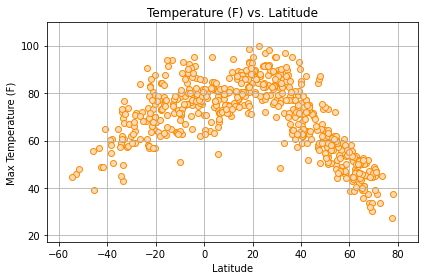

In [24]:
lat = clean_city_data['Lat']
max_temp = clean_city_data['Max Temp']


plt.scatter(x=lat, y=max_temp, marker="o", facecolors="peachpuff", edgecolors="darkorange")
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(max_temp)-10, max(max_temp)+10)
plt.grid(b=None, which='major', axis='both')

plt.tight_layout()

plt.savefig(os.path.join("Output","maxtemps_lats.png"))

## Latitude vs. Humidity Plot

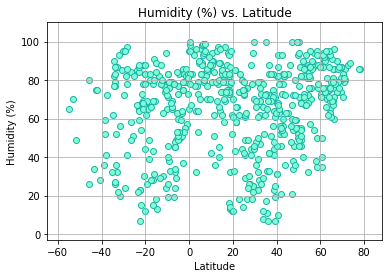

In [25]:
humidity = clean_city_data['Humidity']

plt.scatter(x=lat, y=humidity, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(humidity)-10, max(humidity)+10)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats.png"))

## Latitude vs. Cloudiness Plot

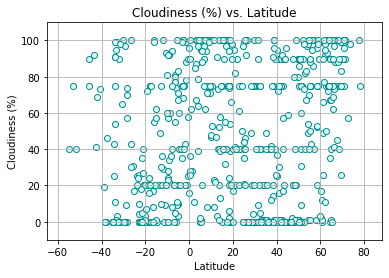

In [26]:
cloudiness = clean_city_data['Cloudiness']

plt.scatter(x=lat, y=cloudiness, marker="o", facecolors="lightcyan", edgecolors="darkcyan")
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(cloudiness)-10, max(cloudiness)+10)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats.png"))

## Latitude vs. Wind Speed Plot

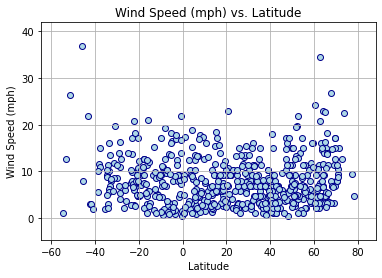

In [30]:
wind_speed = clean_city_data['Wind Speed']

plt.scatter(x=lat, y=wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(wind_speed)-5, max(wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats.png"))

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.7809521951731777.


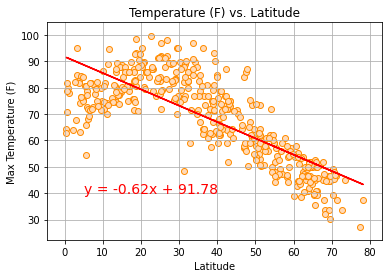

In [41]:
northern = clean_city_data.loc[clean_city_data['Lat'] >=0]
southern = clean_city_data.loc[clean_city_data['Lat'] <0]

northern_lats = northern['Lat']
northern_max_temps = northern['Max Temp']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(northern_lats, northern_max_temps)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is {rvalue}.')
plt.scatter(x=northern_lats, y=northern_max_temps, marker="o", facecolors="peachpuff", edgecolors="darkorange")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (5, 40), fontsize=14, color="red")


plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_max_temps)-5, max(northern_max_temps)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","maxtemps_latitude_lr_north.png"))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6674222934583104.


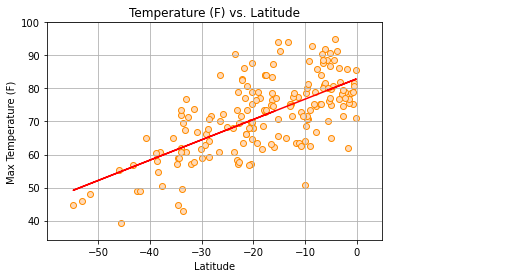

In [40]:
southern_lats = southern['Lat']
southern_max_temps = southern['Max Temp']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(southern_lats, southern_max_temps)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is {rvalue}.')
plt.scatter(x=southern_lats, y=southern_max_temps, marker="o", facecolors="peachpuff", edgecolors="darkorange")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (5, 40), fontsize=14, color="red")


plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_max_temps)-5, max(southern_max_temps)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","maxtemps_lats_lr_south.png"))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.06006069268250739.


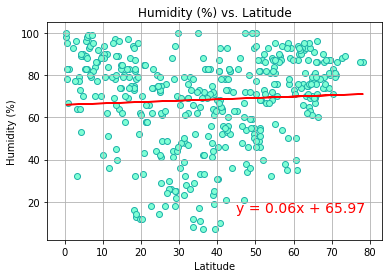

In [43]:
northern_hums = northern['Humidity']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(northern_lats, northern_hums)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is {rvalue}.')
plt.scatter(x=northern_lats, y=northern_hums, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (45, 15), fontsize=14, color="red")


plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_hums)-5, max(northern_hums)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats_lr_north.png"))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.05395733232965514.


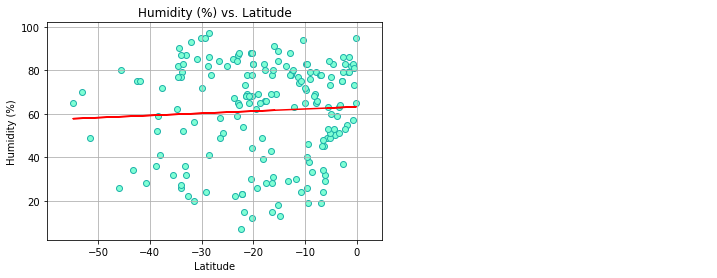

In [44]:
southern_hums = southern['Humidity']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(southern_lats, southern_hums)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is {rvalue}.')
plt.scatter(x=southern_lats, y=southern_hums, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (45, 15), fontsize=14, color="red")


plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_hums)-5, max(southern_hums)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats_lr_south.png"))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.09808336208466627.


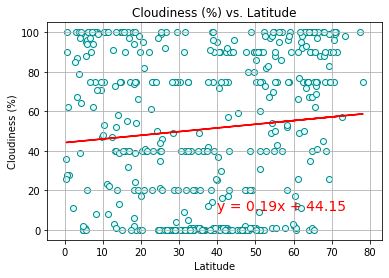

In [45]:
northern_clouds = northern['Cloudiness']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(northern_lats, northern_clouds)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is {rvalue}.')
plt.scatter(x=northern_lats, y=northern_clouds, marker="o", facecolors="lightcyan", edgecolors="darkcyan")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (40, 10), fontsize=14, color="red")


plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_clouds)-5, max(northern_clouds)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats_lr_north.png"))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.09271257713797493.


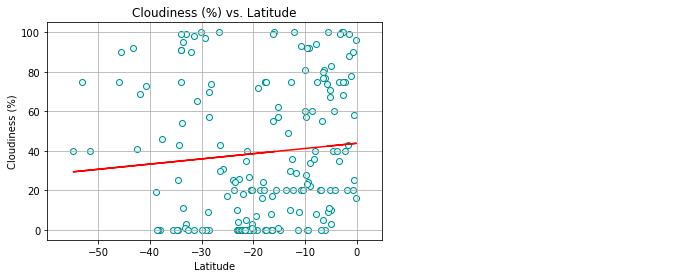

In [46]:
southern_clouds = southern['Cloudiness']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(southern_lats, southern_clouds)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is {rvalue}.')
plt.scatter(x=southern_lats, y=southern_clouds, marker="o", facecolors="lightcyan", edgecolors="darkcyan")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (40, 10), fontsize=14, color="red")


plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_clouds)-5, max(southern_clouds)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats_lr_south.png"))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.15640185363127976.


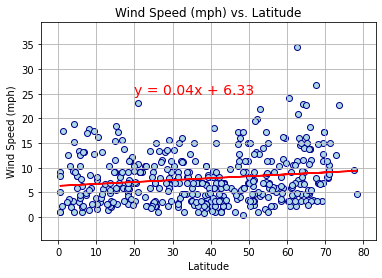

In [47]:
northern_wind_speed = northern['Wind Speed']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(northern_lats, northern_wind_speed)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is {rvalue}.')
plt.scatter(x=northern_lats, y=northern_wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (20,25), fontsize=14, color="red")


plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_wind_speed)-5, max(northern_wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats_lr_north.png"))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.16743303799301065.


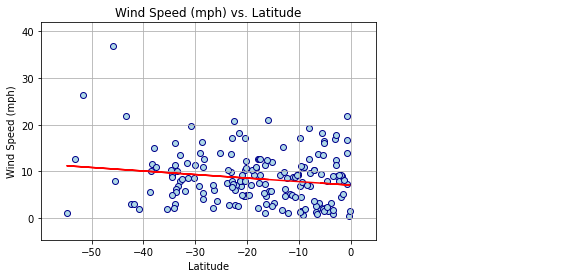

In [48]:
southern_wind_speed = southern['Wind Speed']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(southern_lats, southern_wind_speed)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is {rvalue}.')
plt.scatter(x=southern_lats, y=southern_wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (20,25), fontsize=14, color="red")


plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_wind_speed)-5, max(southern_wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats_lr_south.png"))